In [1]:
load('.RData')

In [3]:
library(factoextra)
library(tidyverse)
library(NbClust)
library(ggpubr)
library(cluster)
library(dendextend)

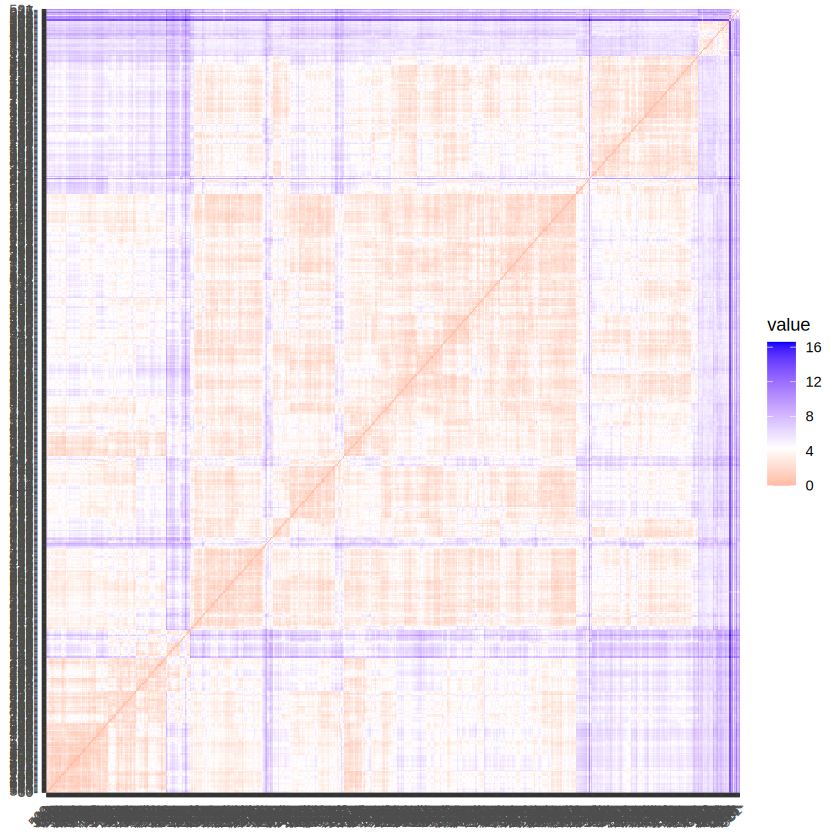

In [5]:
df.sc <- scale(df[, 1:11])
dist.eucl <- dist(df.sc, method = 'euclidean')
fviz_dist(dist.eucl)

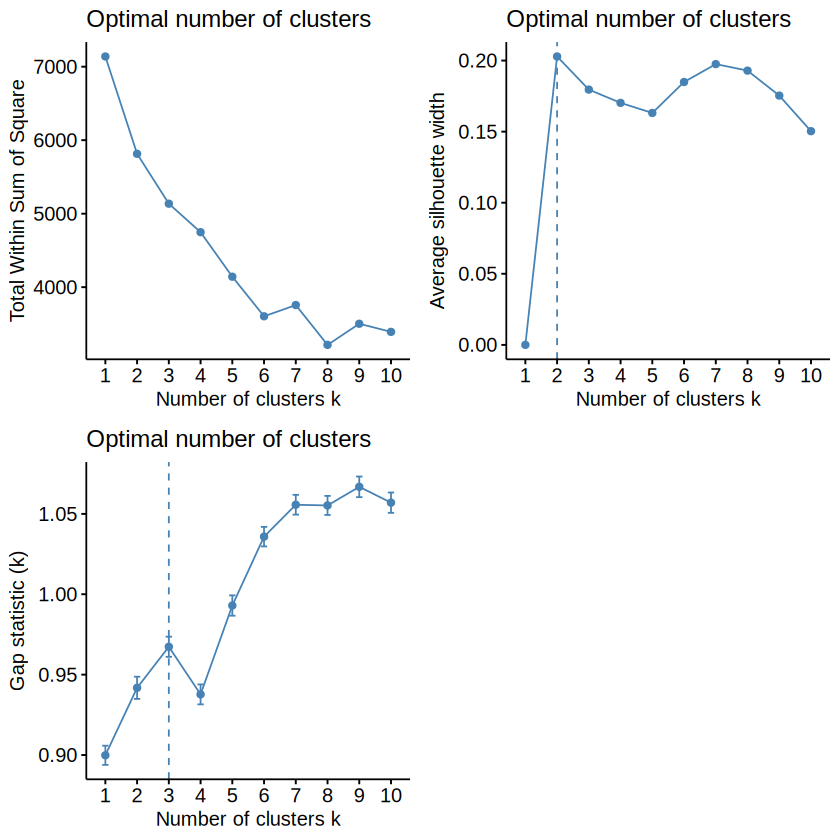

In [7]:
ggarrange(
    fviz_nbclust(df.sc, kmeans, method = 'wss'),
    fviz_nbclust(df.sc, kmeans, method = 'silhouette'),
    fviz_nbclust(df.sc, kmeans, method = 'gap_stat'),
    NULL,
    ncol = 2, nrow = 2, align = 'hv'
)

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


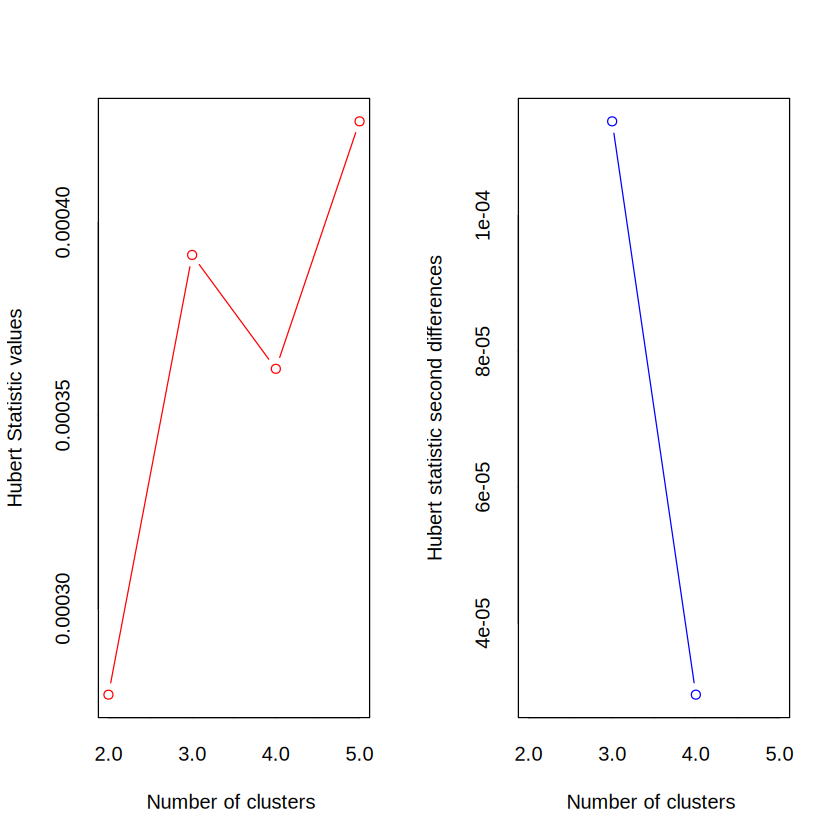

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 8 proposed 2 as the best number of clusters 
* 11 proposed 3 as the best number of clusters 
* 1 proposed 4 as the best number of clusters 
* 3 proposed 5 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  3 
 
 
******************************************************************* 


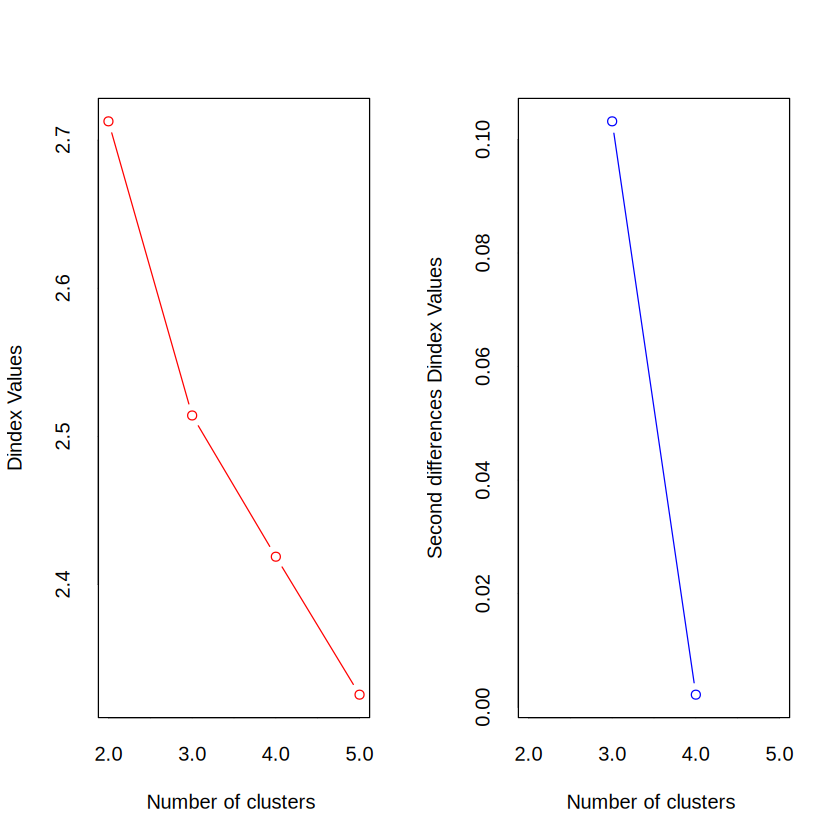

In [8]:
nb <- NbClust(df.sc, distance = 'euclidean', min.nc = 2, max.nc = 5, method = 'kmeans')

Warning message:
“ggrepel: 639 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 640 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 642 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 639 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


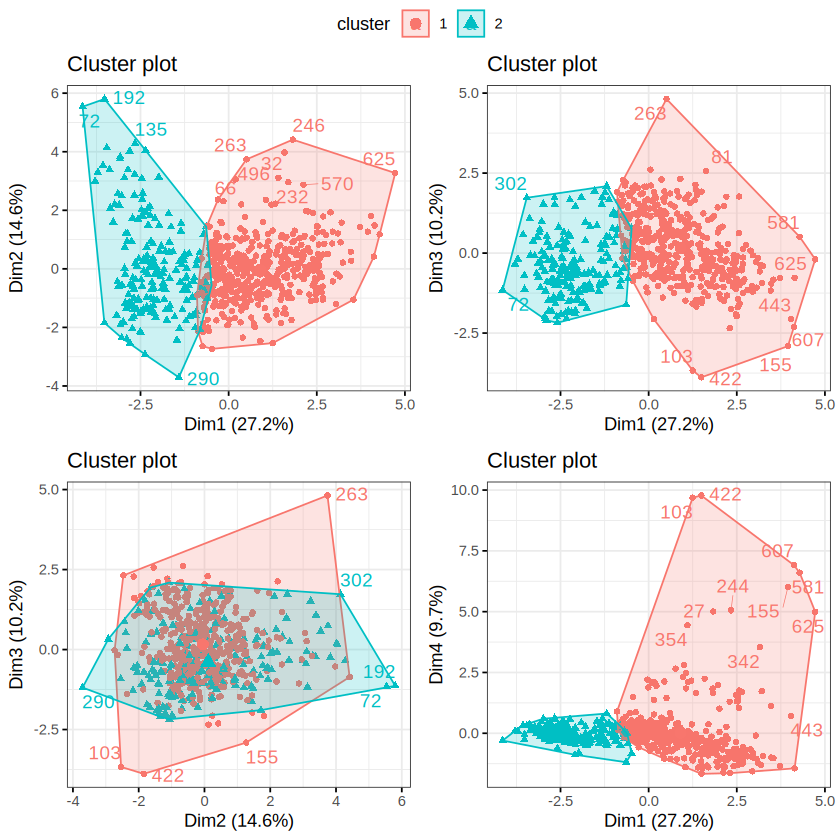

In [11]:
## k = 2
k2 <- kmeans(df.sc, 2, nstart = 25)
c1 <- fviz_cluster(k2, data = df.sc,
            axes = c(1, 2), 
            repel = TRUE, # Avoid label overplotting (slow)
            ggtheme = theme_bw())
c2 <- fviz_cluster(k2, data = df.sc,
            axes = c(1, 3), 
            repel = TRUE, # Avoid label overplotting (slow)
            ggtheme = theme_bw())
c3 <- fviz_cluster(k2, data = df.sc,
            axes = c(2, 3), 
            repel = TRUE, # Avoid label overplotting (slow)
            ggtheme = theme_bw())
c4 <- fviz_cluster(k2, data = df.sc,
            axes = c(1, 4), 
            repel = TRUE, # Avoid label overplotting (slow)
            ggtheme = theme_bw())
ggarrange(
    c1, c2, c3, c4,
    ncol = 2, nrow = 2, align = 'hv',
    common.legend = TRUE, legend = 'top'
)

Warning message:
“ggrepel: 639 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 640 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 642 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 639 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


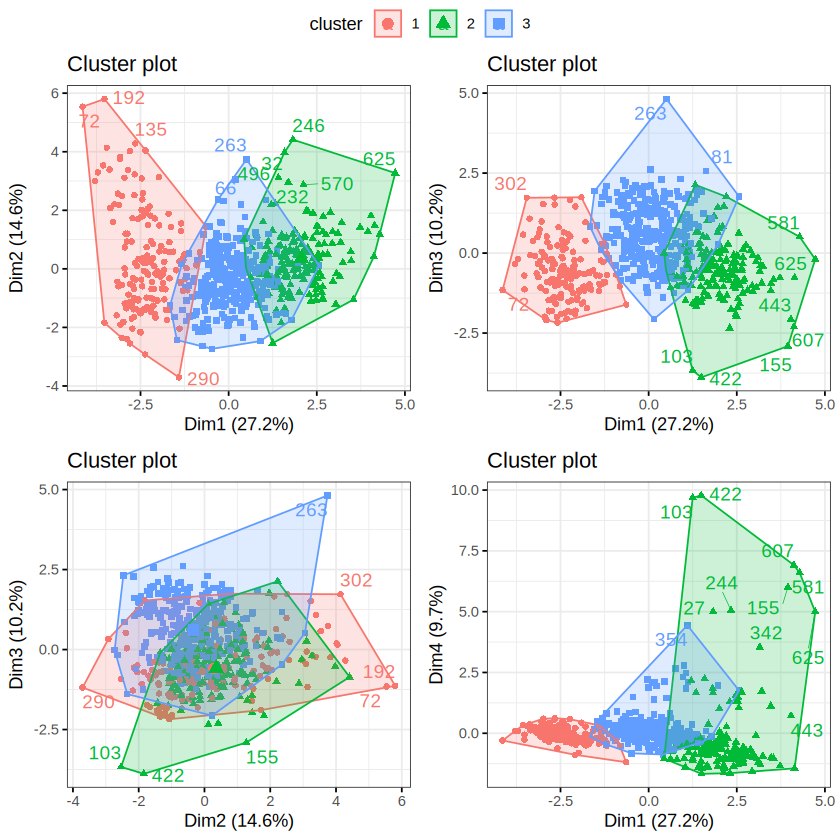

In [12]:
## k = 3
k3 <- kmeans(df.sc, 3, nstart = 25)

c1 <- fviz_cluster(k3, data = df.sc,
            axes = c(1, 2), 
            repel = TRUE, # Avoid label overplotting (slow)
            ggtheme = theme_bw())
c2 <- fviz_cluster(k3, data = df.sc,
            axes = c(1, 3), 
            repel = TRUE, # Avoid label overplotting (slow)
            ggtheme = theme_bw())
c3 <- fviz_cluster(k3, data = df.sc,
            axes = c(2, 3), 
            repel = TRUE, # Avoid label overplotting (slow)
            ggtheme = theme_bw())
c4 <- fviz_cluster(k3, data = df.sc,
            axes = c(1, 4), 
            repel = TRUE, # Avoid label overplotting (slow)
            ggtheme = theme_bw())
ggarrange(
    c1, c2, c3, c4,
    ncol = 2, nrow = 2, align = 'hv',
    common.legend = TRUE, legend = 'top'
)

In [18]:
df_clusters <- df[, 1:11]
df$k2 <- k2$cluster
df$k3 <- k3$cluster
df$k2 <- as.factor(df$k2)
df$k3 <- as.factor(df$k3)

In [19]:
summary(df)

 fixed.acidity    volatile.acidity   citric.acid     residual.sugar  
 Min.   : 4.800   Min.   :  0.110   Min.   :0.0000   Min.   : 0.900  
 1st Qu.: 6.400   1st Qu.:  0.230   1st Qu.:0.2500   1st Qu.: 1.900  
 Median : 7.000   Median :  0.300   Median :0.3100   Median : 3.200  
 Mean   : 7.168   Mean   :  5.993   Mean   :0.3235   Mean   : 5.466  
 3rd Qu.: 7.600   3rd Qu.:  0.400   3rd Qu.:0.4000   3rd Qu.: 8.200  
 Max.   :15.000   Max.   :595.000   Max.   :1.6600   Max.   :26.050  
   chlorides       free.sulfur.dioxide total.sulfur.dioxide    density         
 Min.   :  0.030   Min.   : 2.00       Min.   :  7.0        Min.   :   0.9874  
 1st Qu.:  0.083   1st Qu.:17.00       1st Qu.: 80.0        1st Qu.:   0.9926  
 Median : 34.000   Median :28.00       Median :116.0        Median :   0.9952  
 Mean   : 28.751   Mean   :29.93       Mean   :113.9        Mean   :  48.3980  
 3rd Qu.: 45.000   3rd Qu.:40.00       3rd Qu.:150.8        3rd Qu.:   0.9972  
 Max.   :172.000   Max.   :87.